In [2]:
# Dependencies
%matplotlib notebook
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint 

In [68]:
# Read CSV
csv = "games_1.csv"
games = pd.read_csv(csv)
games.head(100)

,Unnamed: 0,Game ID,Rated,Turns,Victory Status,Winner,Increment Code,White ID,White Rating,Black ID,...,Moves,Opening ECO,Opening Name,Opening Ply,Average Rating,Diff,Delay Time(min),Move Time(sec),Favored,Upset
0,1,l1NXvwaE,True,16,resign,black,5+10,a-00,1322,skinnerua,...,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1291.5,61,5,10,white,True
1,2,mIICvQHh,True,61,mate,white,5+10,ischia,1496,a-00,...,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1498.0,4,5,10,black,True
2,3,kWKvrqYL,True,61,mate,white,20+0,daniamurashov,1439,adivanov2009,...,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1446.5,15,20,0,black,True
3,4,9tXo1AUZ,True,95,mate,white,30+3,nik221107,1523,adivanov2009,...,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1496.0,54,30,3,white,False
4,5,MsoDV9wj,False,5,draw,draw,10+0,trelynn17,1250,franklin14532,...,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4,1126.0,248,10,0,white,True
5,6,qwU9rasv,True,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,...,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10,1471.5,97,10,0,white,False
6,7,RVN0N3VK,False,9,resign,black,15+30,daniel_likes_chess,1413,soultego,...,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5,1760.5,695,15,30,black,False
7,8,dwF3DJHO,True,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,...,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6,1415.5,47,15,0,white,True
8,9,afoMwnLg,True,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,...,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4,1295.0,172,10,0,white,False
9,10,HgKLWPsz,False,39,mate,white,20+60,daniel_likes_chess,1381,anaissac,...,e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...,A00,Van't Kruijs Opening,1,1326.5,109,20,60,white,False


In [58]:
total_ECO_group1 = games.groupby("Opening ECO").count().sort_values("Winner", ascending=False)
total_ECO_group2 =total_ECO_group1.drop(columns=[ "Game ID", "Rated","Turns", "Victory Status",  "Increment Code", "White ID", "White Rating", "Black ID", "Black Rating", "Moves", "Opening Ply","Opening Name", "Average Rating","Diff", "Delay Time(min)", "Move Time(sec)", "Favored", "Upset"])

total_ECO_group3 =total_ECO_group2.iloc[0:10]

total_ECO_group4 = total_ECO_group3.drop(columns=["Winner"])


<IPython.core.display.Javascript object>


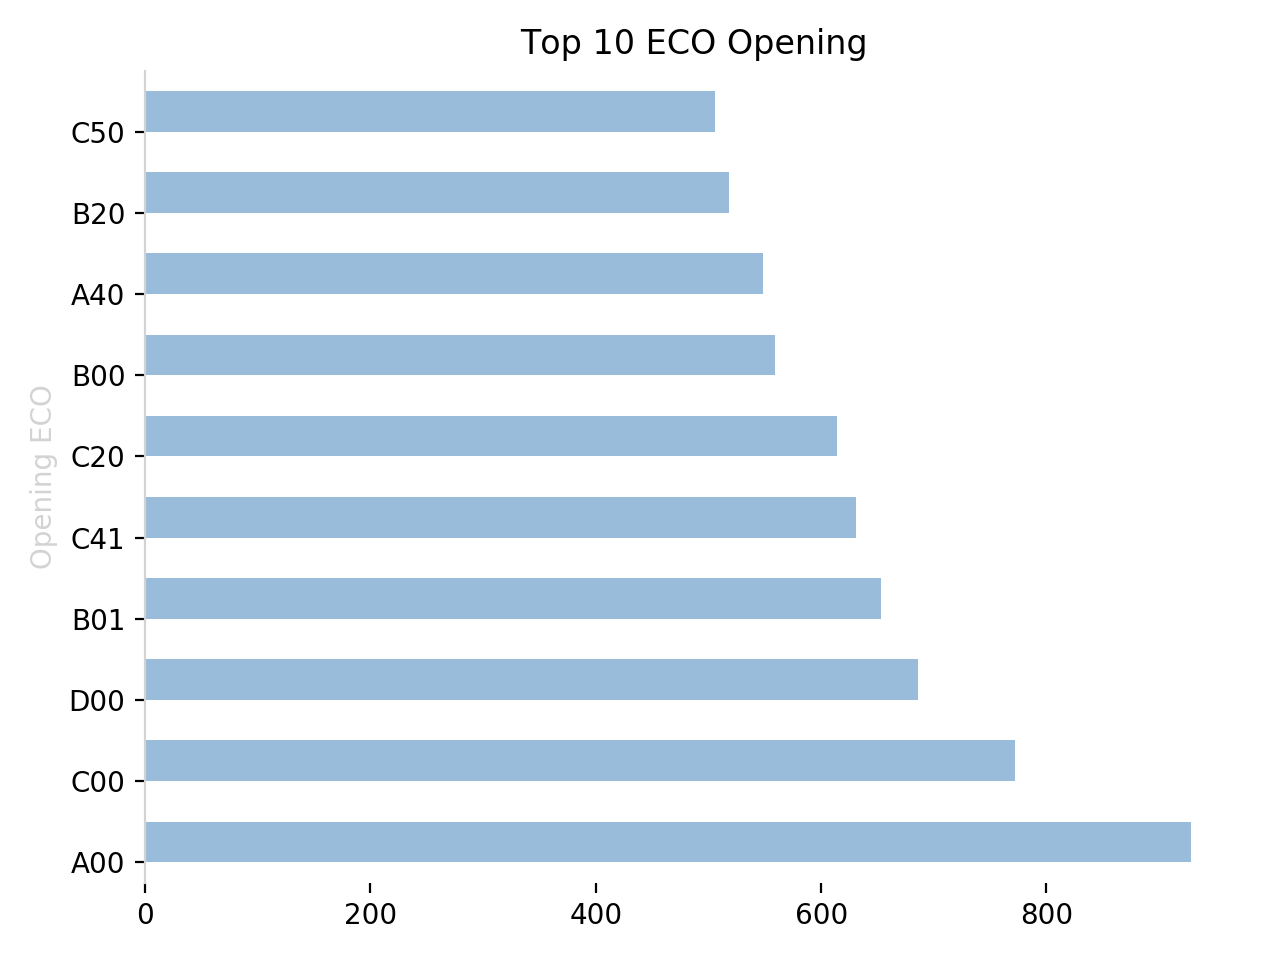

In [75]:
ECO_chart = total_ECO_group4.plot(kind='barh',title="Top 10 ECO Opening", 
                                color=['#327AB7'],  legend=False,
                                  alpha=0.5, align="edge")


#ECO_chart.lable
ECO_chart.spines['top'].set_visible(False)
ECO_chart.spines['right'].set_visible(False)
ECO_chart.spines['bottom'].set_visible(False)
ECO_chart.spines['left'].set_color('lightgrey')
ECO_chart.yaxis.label.set_color('lightgrey')
ECO_chart.tick_params(axis='x', colors='black')
ECO_chart.tick_params(axis='y', colors='black')
plt.show()
plt.tight_layout()
plt.savefig('Top 10 ECO Opening.png')

In [77]:
total_winners_group = games.groupby("Winner")
avg_winners = total_winners_group['Turns'].mean().sort_values()
#random pick up 500 samples
random_games = games.sample(n=500)

<IPython.core.display.Javascript object>


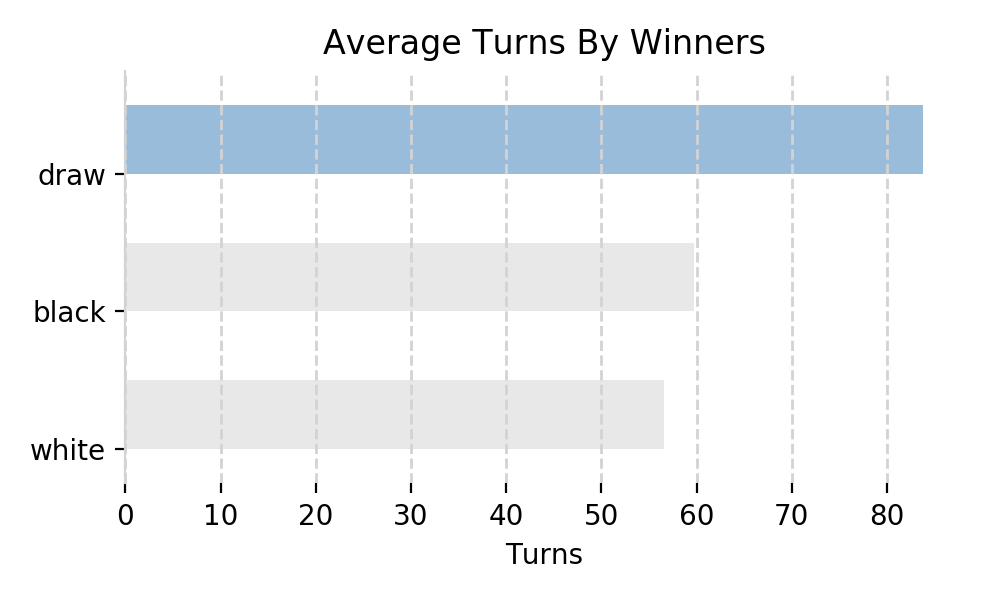

In [5]:
# Create a barh chart based off of the group series from before
plt.figure(figsize=(5,3))

winner_chart = avg_winners.plot(kind='barh',title="Average Turns By Winners", 
                                color=['lightgrey', 'lightgrey', '#327AB7'], alpha=0.5, align="edge")


# Set the xlabel and ylabel
winner_chart.set_xlabel("Turns")
winner_chart.set_ylabel("").set_color('lightgrey')

plt.grid(True, axis="x",  linestyle = "--", color = "lightgrey", linewidth = "1")
# frame invisible
winner_chart.spines['top'].set_visible(False)
winner_chart.spines['right'].set_visible(False)
winner_chart.spines['bottom'].set_visible(False)
winner_chart.spines['left'].set_color('lightgrey')
winner_chart.yaxis.label.set_color('lightgrey')
winner_chart.tick_params(axis='x', colors='black')
winner_chart.tick_params(axis='y', colors='black')
plt.show()
plt.tight_layout()
plt.savefig('Average Turns By Winners.png')

<IPython.core.display.Javascript object>


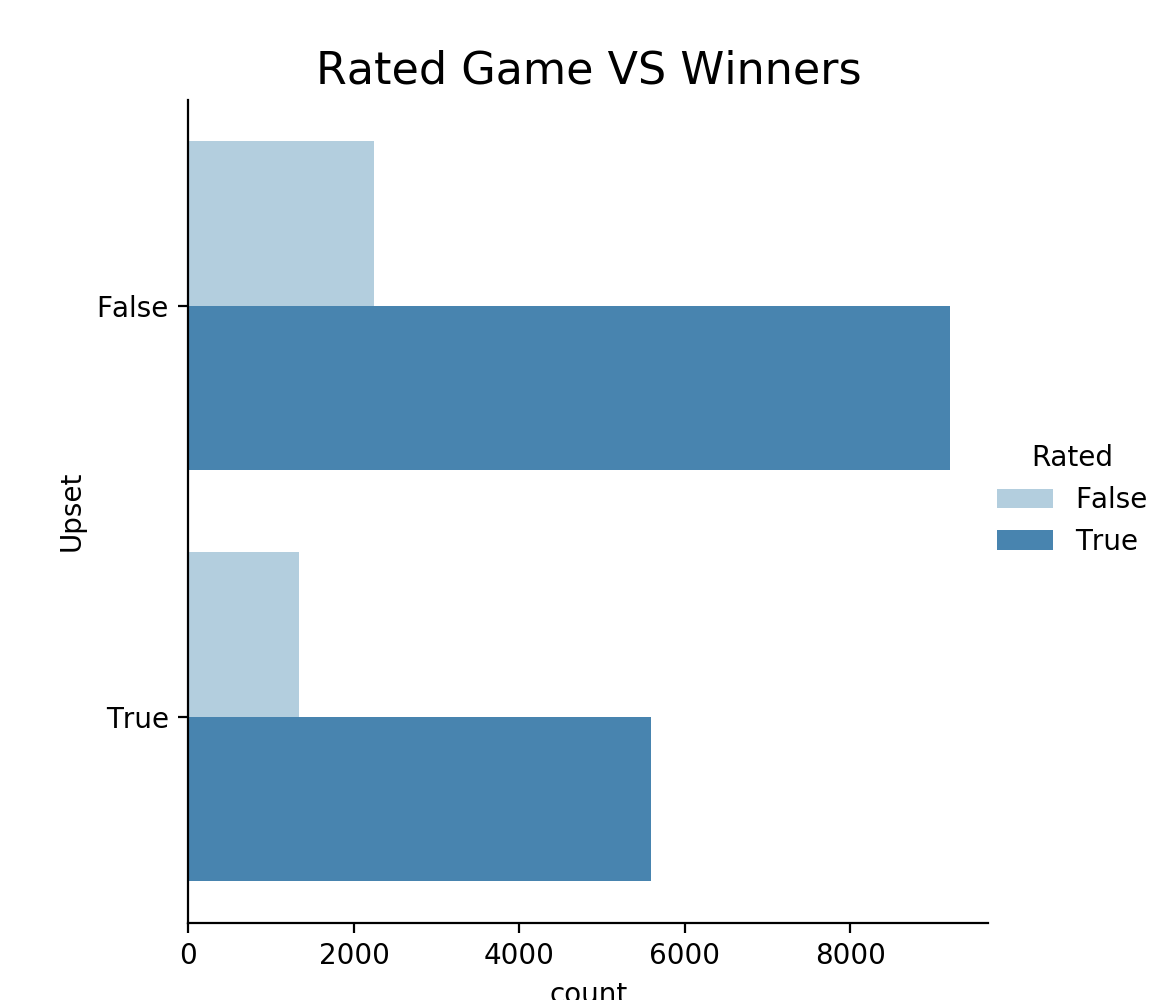

In [6]:
sns.catplot(y="Upset", hue="Rated", data=games,
            kind='count',palette = 'Blues')  
plt.subplots_adjust(top=0.9)
plt.title("Rated Game VS Winners",fontsize=16)
plt.savefig('Rated Game VS Winners.png')

<IPython.core.display.Javascript object>


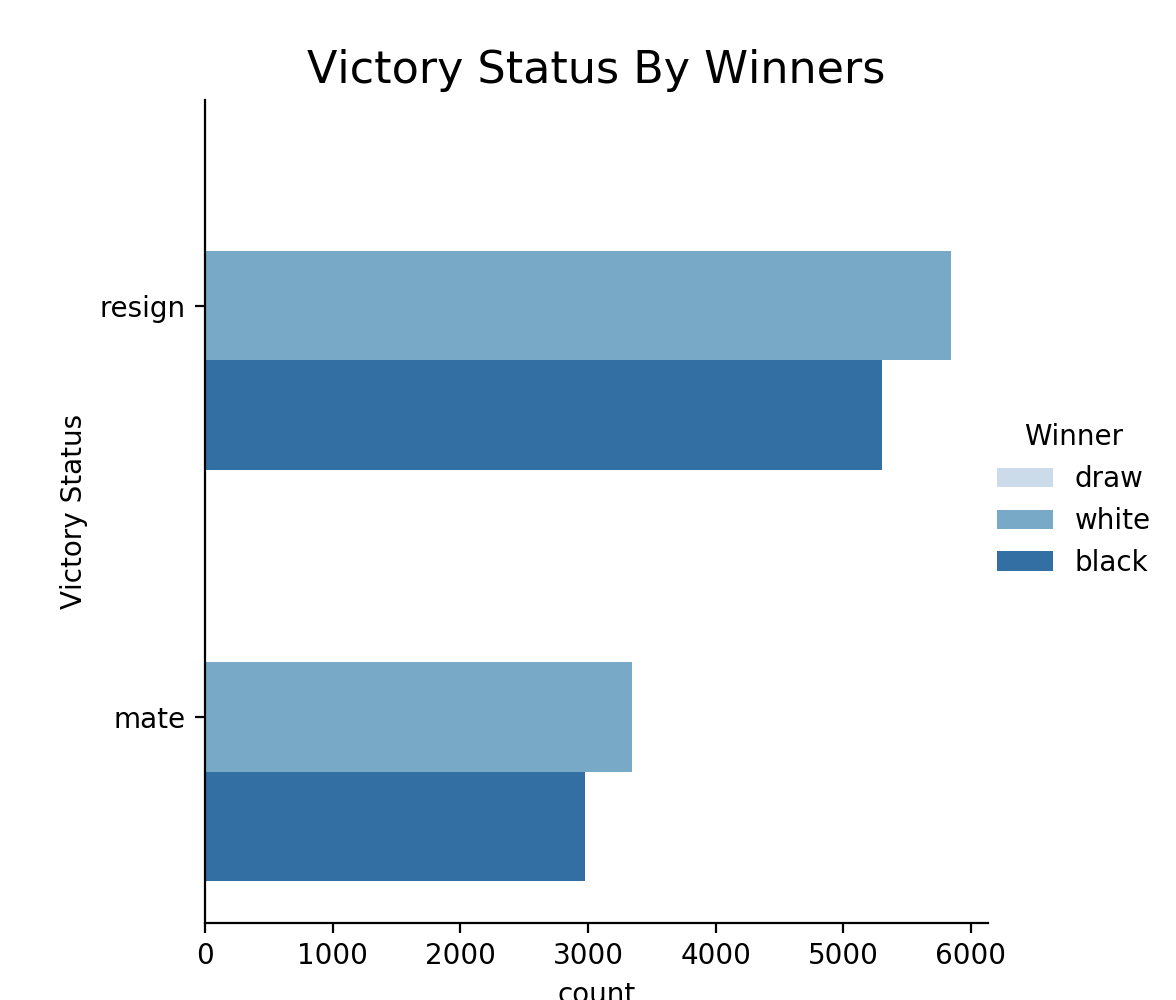

In [7]:
sns.catplot(y="Victory Status", hue="Winner", data=games.sort_values("Victory Status"),
            kind='count',palette = 'Blues', order=['resign', 'mate'] )  
plt.subplots_adjust(top=0.9)
plt.title("Victory Status By Winners",fontsize=16)
plt.savefig('Victory Status By Winners.png')

<IPython.core.display.Javascript object>


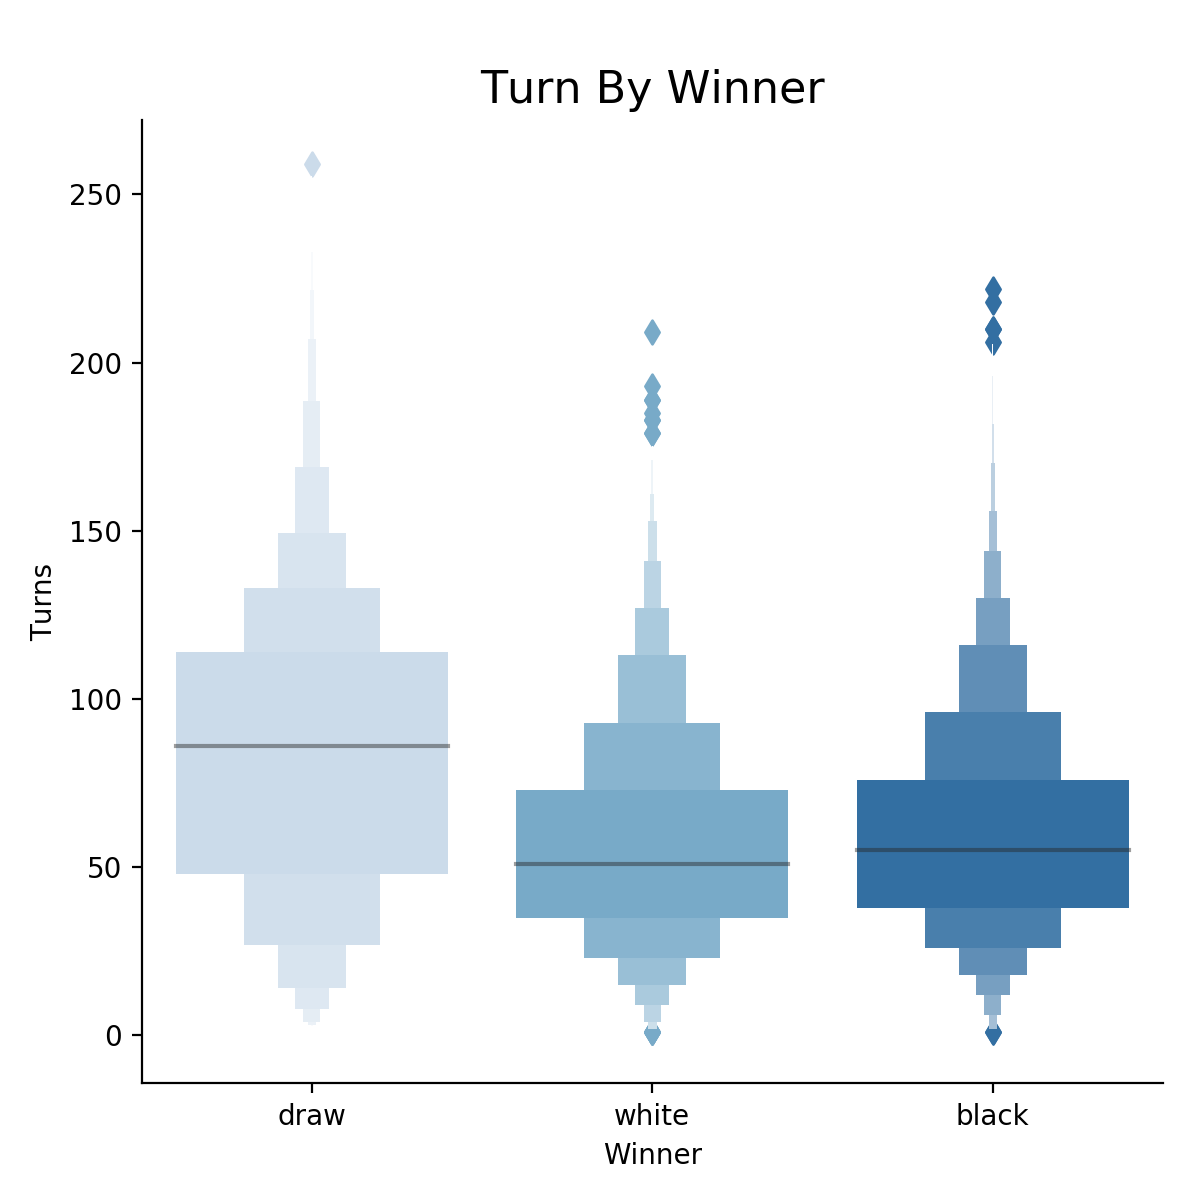

In [22]:
sns.catplot(x='Winner',y='Turns',kind='boxen', palette="Blues", 
           data=games.sort_values("Victory Status"), height=6)
plt.subplots_adjust(top=0.9)
plt.title("Turn By Winner",fontsize=16)
plt.savefig('Turn By Winner.png')

<IPython.core.display.Javascript object>


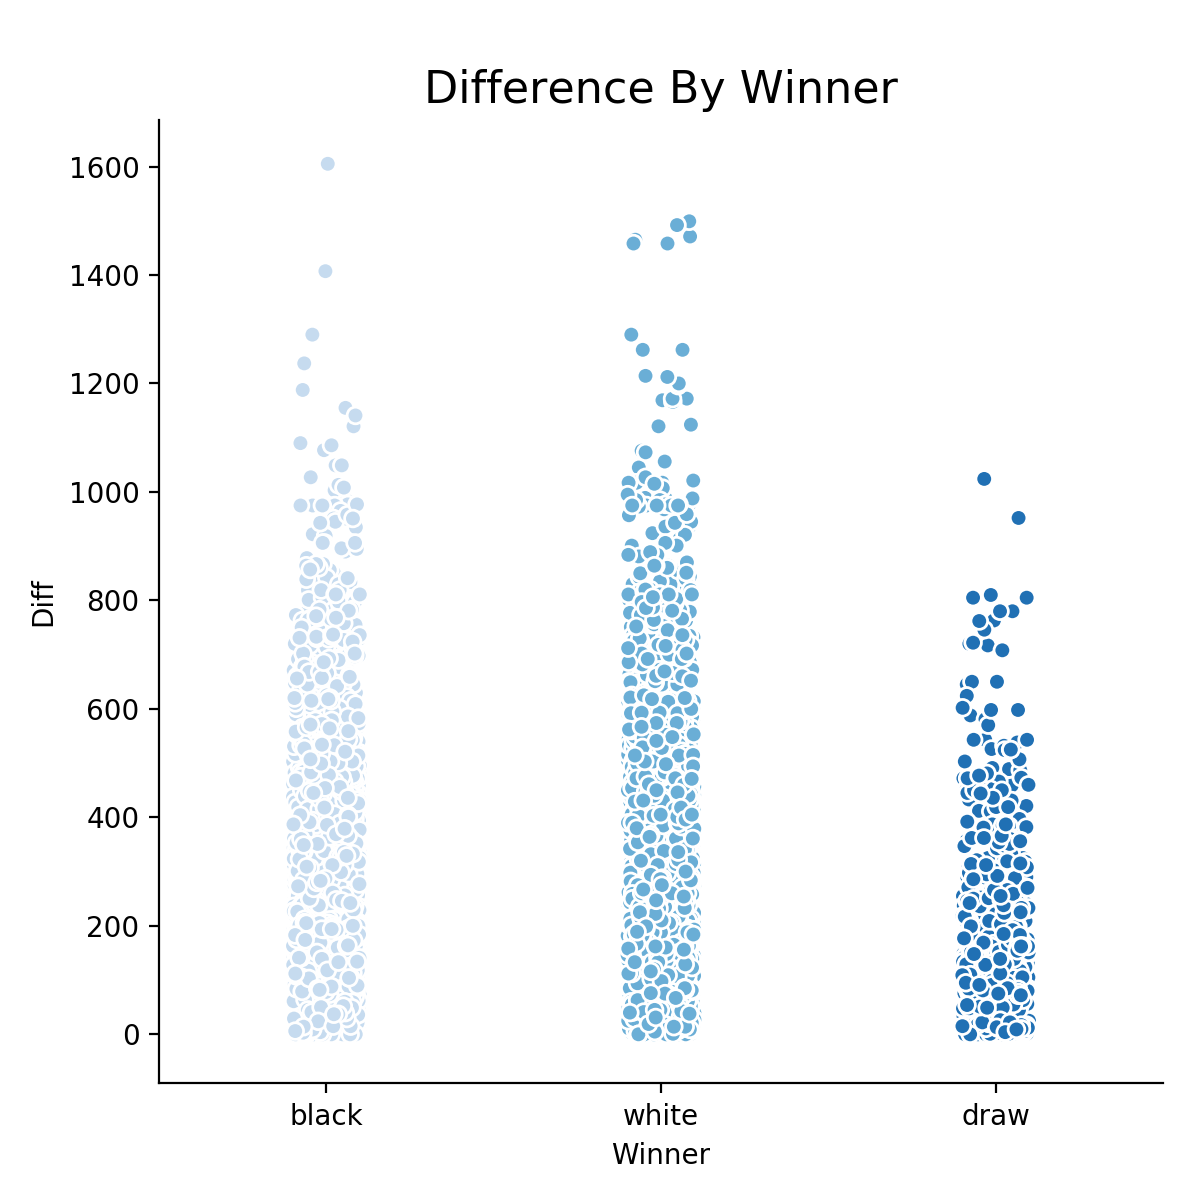

In [8]:
sns.catplot(x="Winner", y="Diff",  
            data=games, jitter = True, height=6, palette="Blues",   
            s = 6, edgecolor = 'w',linewidth=1,marker = 'o')
plt.subplots_adjust(top=0.9)
plt.title("Difference By Winner",fontsize=16)
plt.savefig('Difference By Winner.png')

<IPython.core.display.Javascript object>


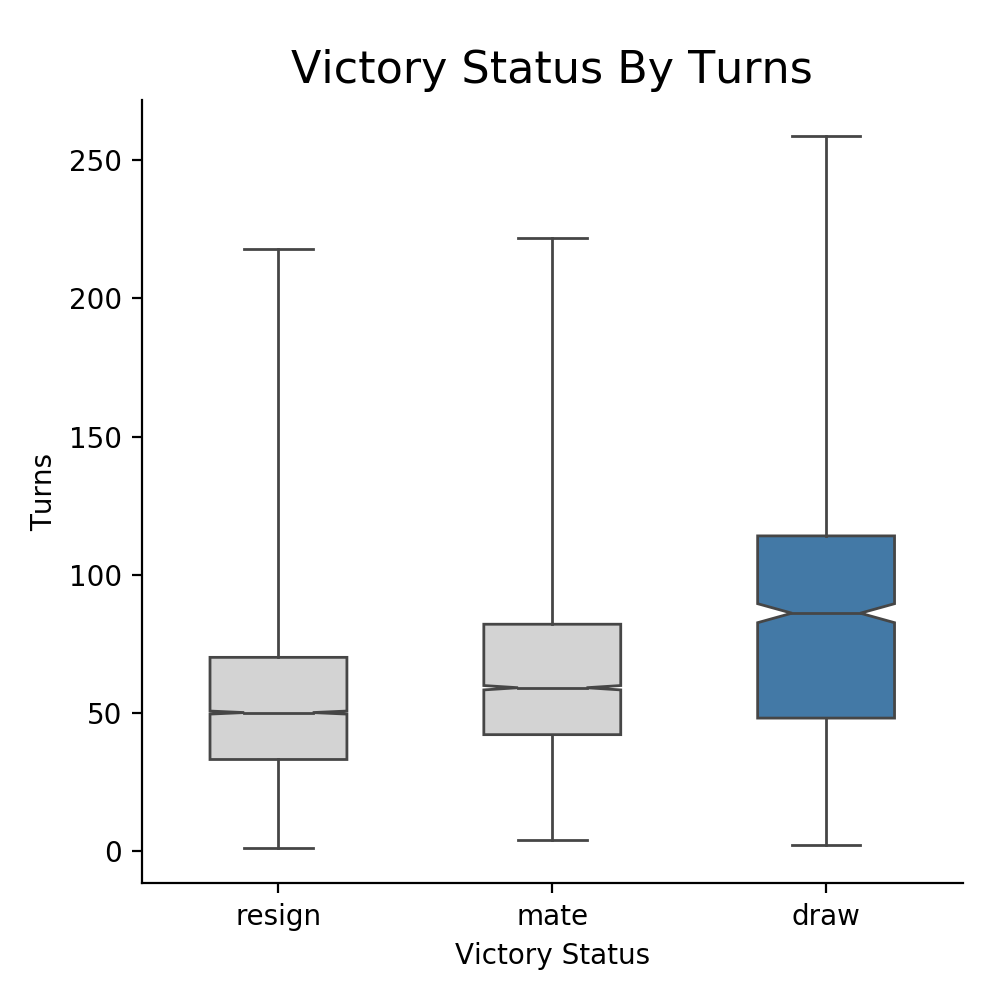

In [16]:
sns.catplot(x='Victory Status', y='Turns', data=games,
            kind='box',linewidth=1,  width=0.5,
            fliersize=18,   palette=['lightgrey', 'lightgrey', '#327AB7'], 
            whis=100,  notch=True
           )
plt.subplots_adjust(top=0.9)
plt.title("Victory Status By Turns",fontsize=16)
plt.savefig('Victory Status By Turns.png')

<IPython.core.display.Javascript object>


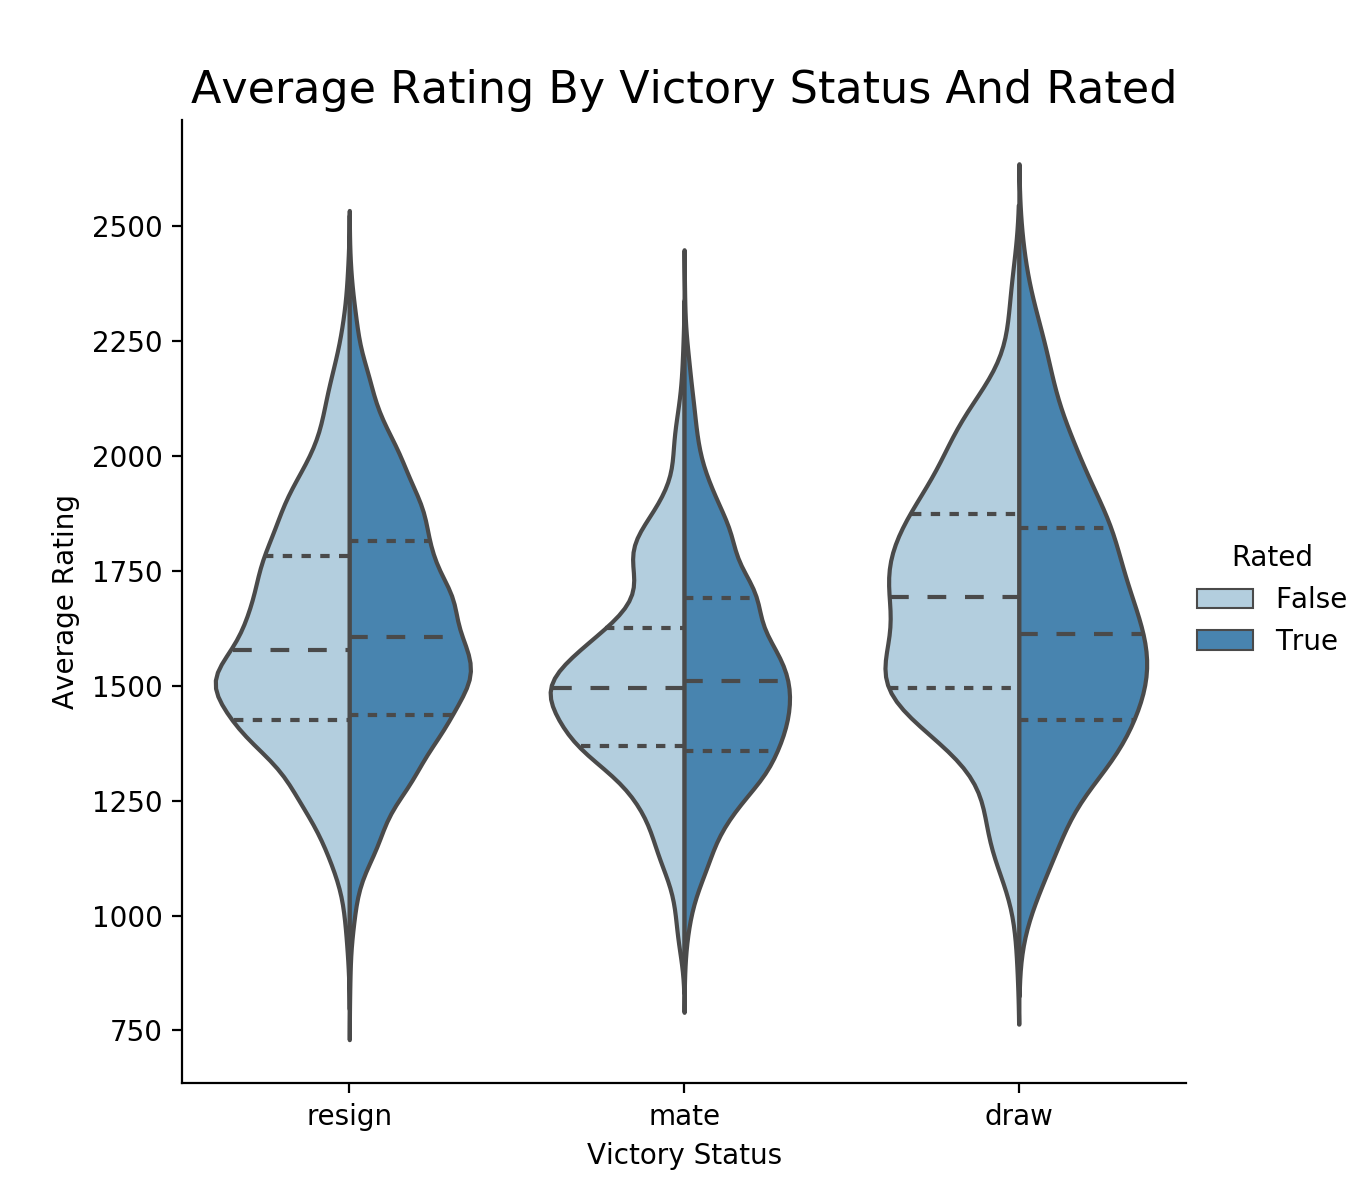

In [8]:
sns.catplot(x="Victory Status", y="Average Rating", data=games,
            kind='violin',hue = 'Rated',palette="Blues", split=True, 
            inner="quartile",height=6)
plt.subplots_adjust(top=0.9)
plt.title("Average Rating By Victory Status And Rated",fontsize=16)
plt.savefig('Average Rating By Victory Status And Rated.png')

<IPython.core.display.Javascript object>


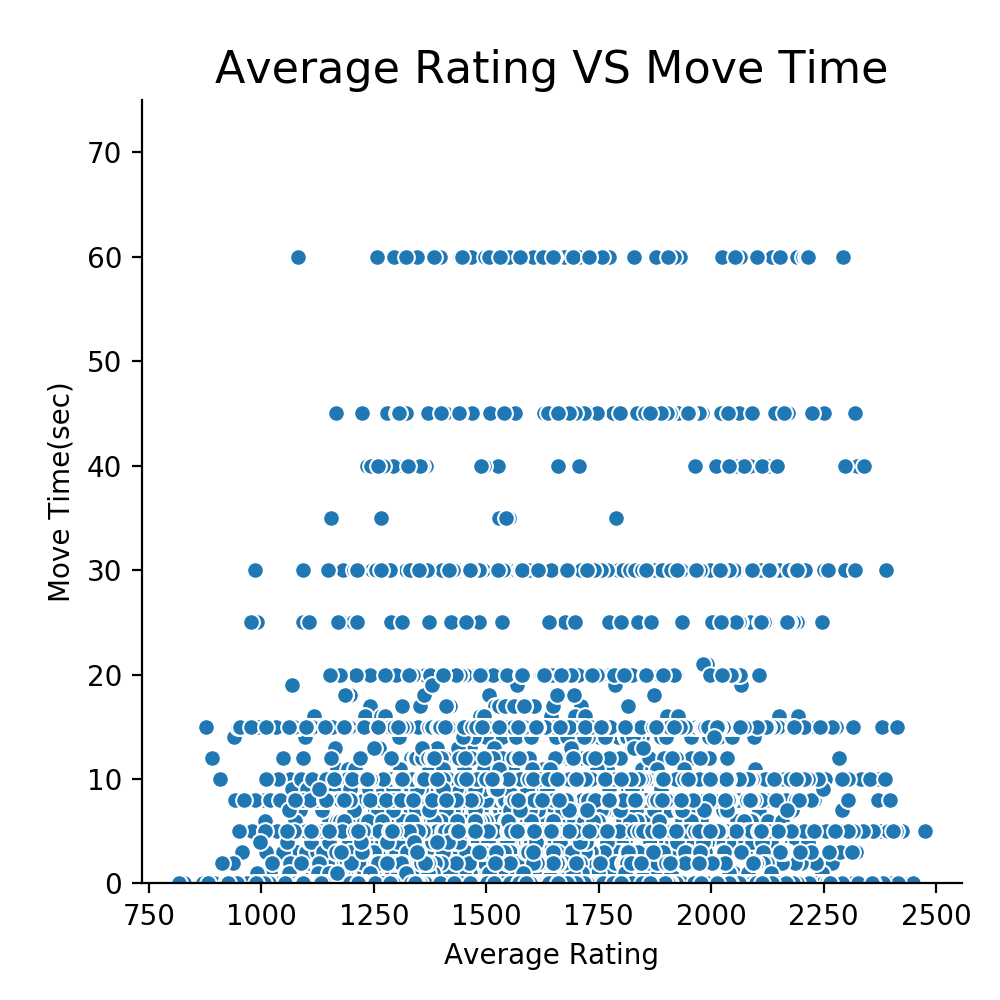

In [87]:
plot = sns.relplot(x='Average Rating',y='Move Time(sec)',data=games,
             palette='Blues')
plot.axes[0,0].set_ylim(0,75) 
plt.subplots_adjust(top=0.9)
plt.title("Average Rating VS Move Time",fontsize=16)
plt.savefig('Average Rating VS Move Time.png')

<IPython.core.display.Javascript object>


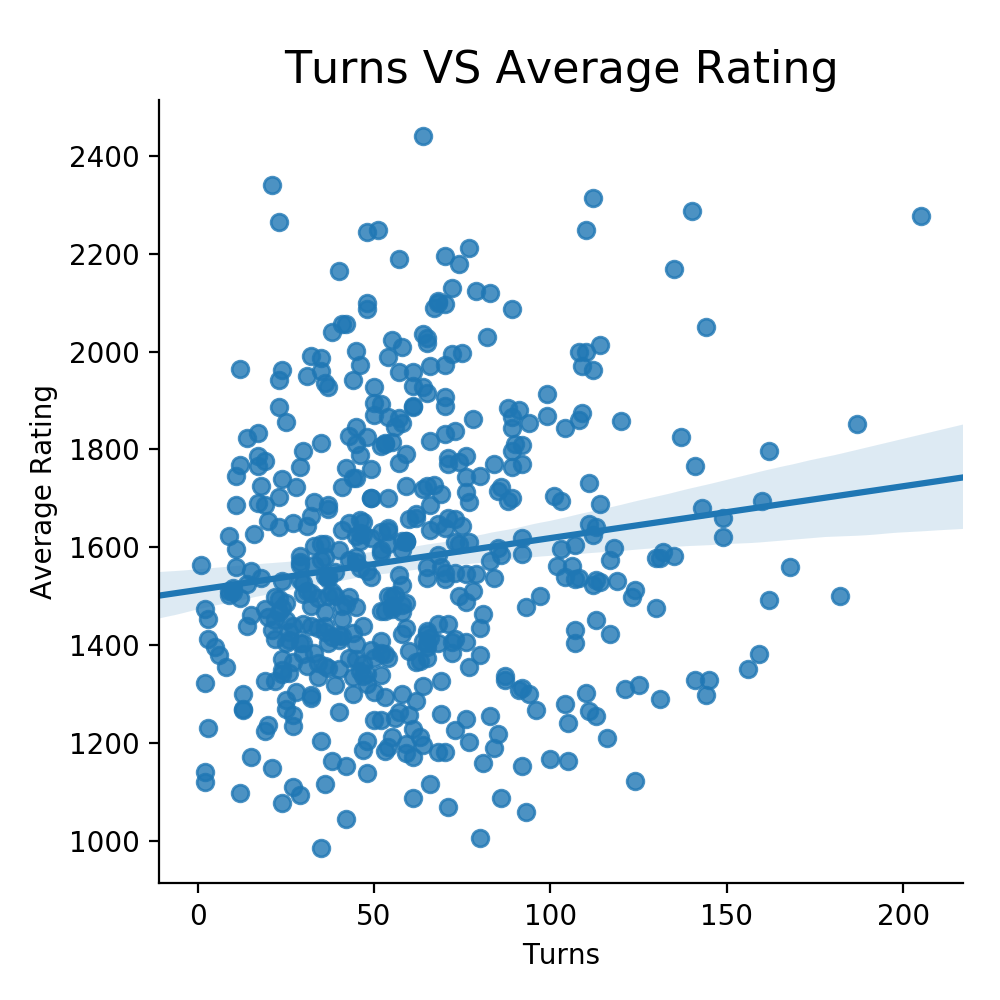

In [97]:
diff_turn = sns.lmplot(x="Turns", y="Average Rating", data=random_games)
plt.title("Turns VS Average Rating",fontsize=16)
plt.subplots_adjust(top=0.9)
plt.savefig('Difference VS Turns.png')
plt.savefig('Turns VS Average Rating.png')

<IPython.core.display.Javascript object>


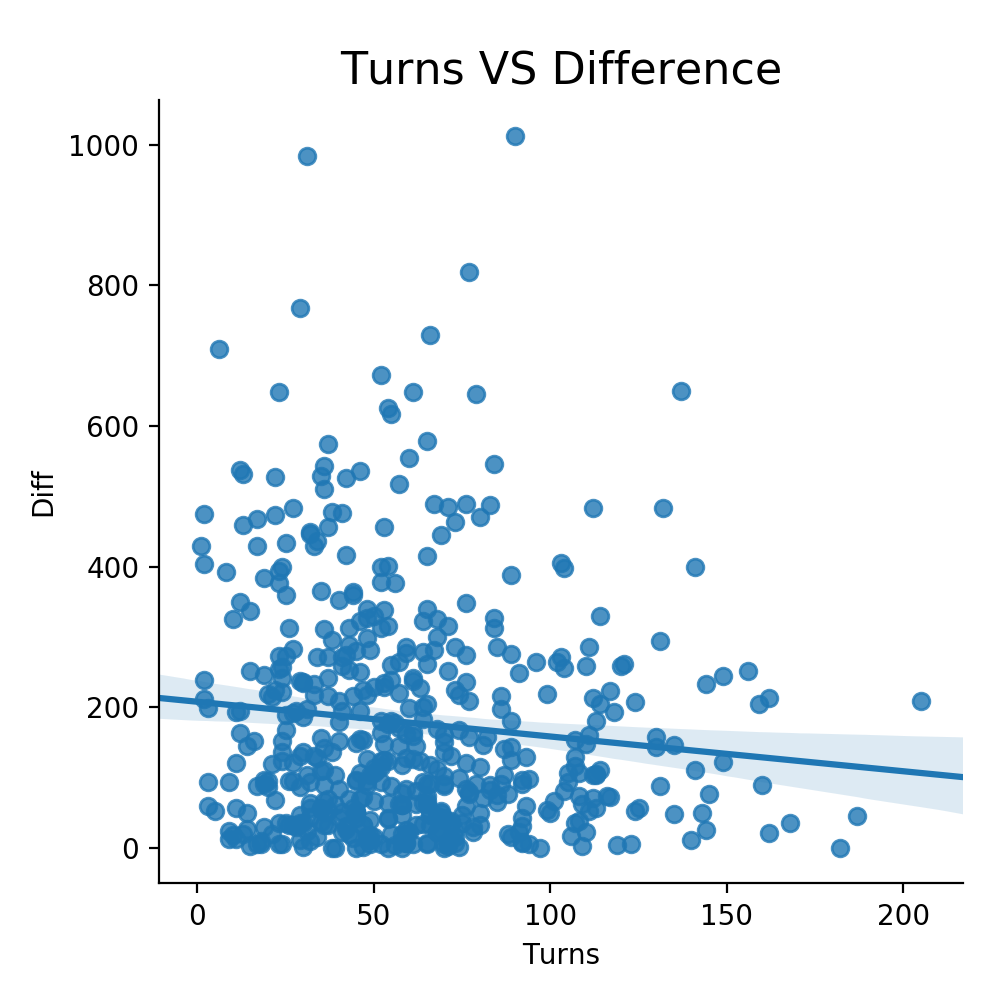

In [98]:
diff_turn = sns.lmplot(x="Turns", y="Diff", data=random_games)
plt.title("Turns VS Difference",fontsize=16)
plt.subplots_adjust(top=0.9)
plt.savefig('Turns VS Difference.png')

<IPython.core.display.Javascript object>


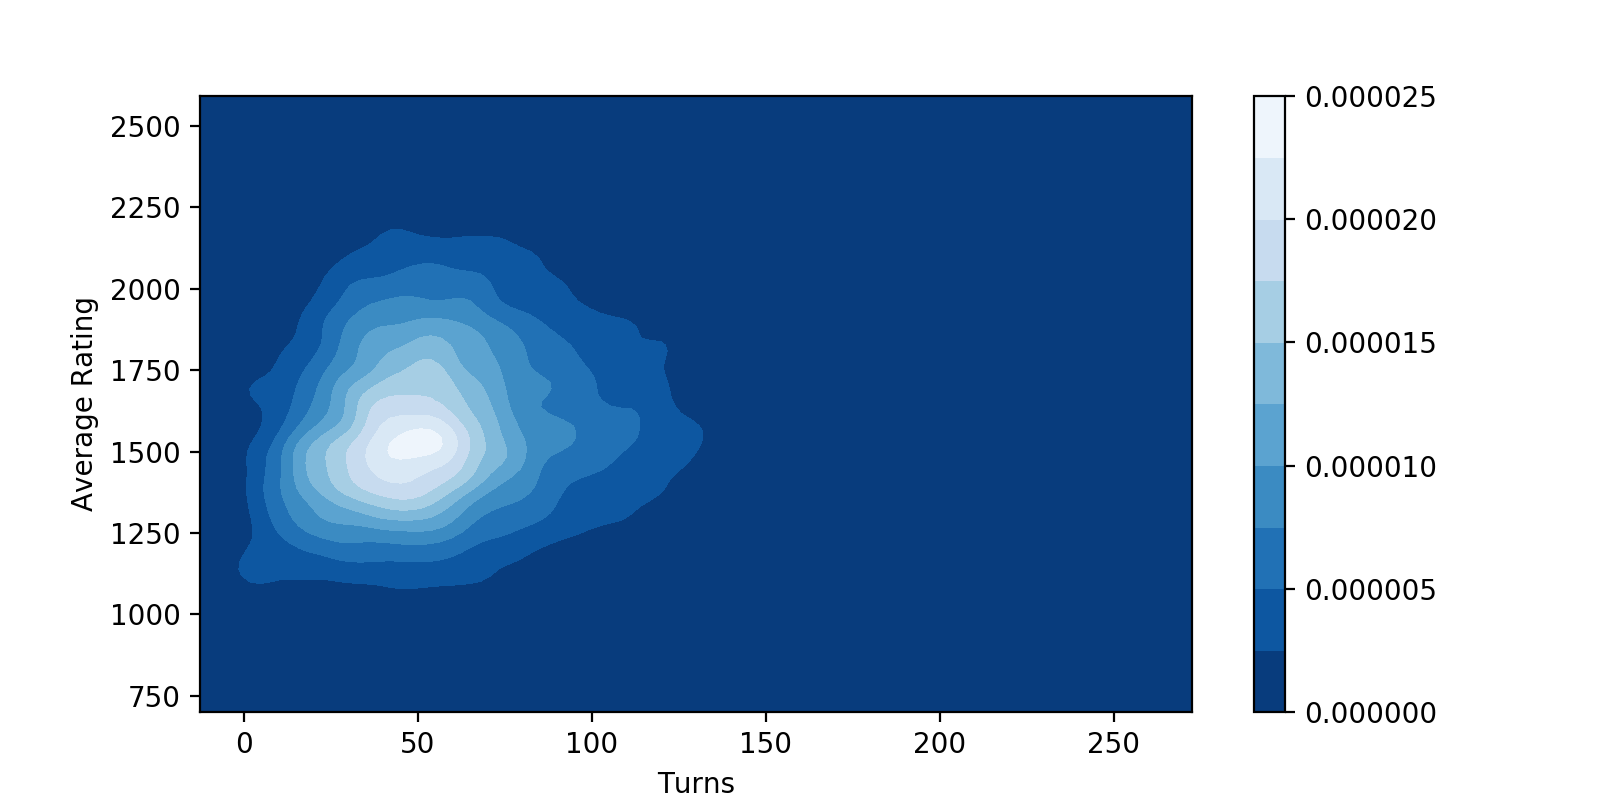

In [90]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(games['Turns'], games['Average Rating'],
           cbar = True, shade = True, cmap = 'Blues_r', shade_lowest=True, n_levels = 10)   
plt.savefig('Average Rating And Turns.png')